**Parte II: Modelo Aprendizaje Supervisado**

**Resumen:** En este proyecto se analiza un conjunto de datos geoquímicos correspondiente a diferentes litologías de rocas ígneas. Se seleccionaron seis variables químicas (FeO*n, MgOn, CaOn, Na₂On, K₂On y SiO₂n) y se aplicaron métodos de análisis exploratorio, visualización y modelado supervisado. Se entrenó un modelo de Árbol de Decisión para predecir la litología a partir de la composición química, evaluando su desempeño mediante métricas de clasificación. Los resultados muestran una exactitud del 78%, indicando que las variables seleccionadas poseen un alto poder predictivo. Este estudio demuestra el potencial del Machine Learning para apoyar tareas de clasificación litológica y análisis geoquímico automatizado.

**Objetivo general**:
Evaluar si un conjunto reducido de variables geoquímicas permite predecir la litología de una muestra utilizando técnicas de aprendizaje supervisado, específicamente Árboles de Decisión.

**El concepto comercial** del proyecto consiste en un asistente automático de clasificación litológica, capaz de predecir el tipo de roca a partir de oxidos químicos obtenidos por técnicas rutinarias como fluorescencia de rayos X (XRF). Esto permitiría agilizar procesos de exploración, reducir costos analíticos y complementar la toma de decisiones en entornos mineros, ambientales y académicos.

In [ ]:
import pandas as pd

# Cargar el archivo
df = pd.read_csv('/content/drive/MyDrive/curso, Data science I/Geoquimica.csv')

# Variables seleccionadas
features = ["FeO*n", "MgOn", "CaOn", "Na2On", "K2On", "SiO2n"]
X = df[features]

# Variable objetivo
y = df["rock_name"]

df.head()


,rock_name,long,lat,SiO2n,TiO2n,Al2O3n,FeO*n,MnOn,MgOn,CaOn,Na2On,K2On,P2O5n
0,Basalt,-122.5850,46.2300,47.77,1.33,15.38,9.59,0.17,10.76,11.28,2.69,0.62,0.41
1,Basalt,-122.5806,46.2436,47.94,1.28,15.22,9.60,0.18,10.87,11.39,2.17,0.96,0.38
2,Basalt,-122.5925,46.2036,51.50,1.12,16.04,8.77,0.15,9.49,9.80,2.64,0.33,0.16
3,Basalt,-122.5797,46.2144,45.66,1.60,14.87,9.90,0.17,9.81,13.09,3.09,0.96,0.84
4,Basalt,-122.5839,46.2100,48.24,1.34,15.91,10.16,0.17,10.06,10.78,2.51,0.56,0.26


In [ ]:
df['rock_name'] = df['rock_name'].str.strip()              # elimina espacios

In [ ]:
df['rock_name'] = df['rock_name'].str.strip()
df['P2O5n'] = df['P2O5n'].replace('<0.05', 0)   # reemplaza el texto por 0
df['P2O5n'] = pd.to_numeric(df['P2O5n'], errors='coerce')  # convierte todo a float

In [ ]:
print(df["rock_name"].value_counts())

rock_name
Basaltic andesite    1181
Andesite              881
Basalt                595
Dacite                217
Granite               145
Diorite               137
Granodiorite          135
Quartz diorite         92
Rhyolite               89
Gabbro                 26
Quartz monzonite       12
Name: count, dtype: int64


Estas variables fueron seleccionadas para entrenar el modelo en base a la etapa exploratoria de datos realizada para la primera entrega.


In [ ]:
features = ["FeO*n", "MgOn", "CaOn", "Na2On", "K2On", "SiO2n"]
X = df[features]
y = df["rock_name"]



Aqui dividimos el dataset en dos partes, una se usara para entrenar los datos y otra para testear el modelo con una relacion 70/30.




In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.30,
    random_state=42,
    stratify=y
)


En esta instancia entrenamos el modelo de arbol de decision segun los criterios preestablecidos. Elegi una profundidad de 3 para el arbol.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, random_state=42)

En las siguientes lineas de codigo calculamos el accuracy del modelo.

El **accuracy** (exactitud) mide qué porcentaje de predicciones del modelo son correctas.
Se calcula matemáticamente como:

**Predicciones correctas/Total de predicciones**



Exactitud del modelo: 0.78


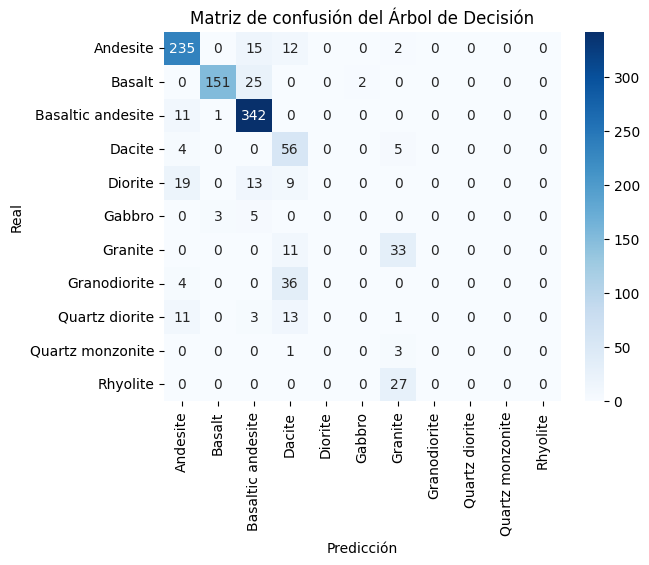

                   precision    recall  f1-score   support

         Andesite       0.83      0.89      0.86       264
           Basalt       0.97      0.85      0.91       178
Basaltic andesite       0.85      0.97      0.90       354
           Dacite       0.41      0.86      0.55        65
          Diorite       0.00      0.00      0.00        41
           Gabbro       0.00      0.00      0.00         8
          Granite       0.46      0.75      0.57        44
     Granodiorite       0.00      0.00      0.00        40
   Quartz diorite       0.00      0.00      0.00        28
 Quartz monzonite       0.00      0.00      0.00         4
         Rhyolite       0.00      0.00      0.00        27

         accuracy                           0.78      1053
        macro avg       0.32      0.39      0.34      1053
     weighted avg       0.70      0.78      0.73      1053



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predicción
y_pred = clf.predict(X_test)

# Exactitud
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del modelo: {accuracy:.2f}")

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=clf.classes_,
            yticklabels=clf.classes_)
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de confusión del Árbol de Decisión")
plt.show()

# Reporte completo
print(classification_report(y_test, y_pred))



Grafica del arbol de decision.

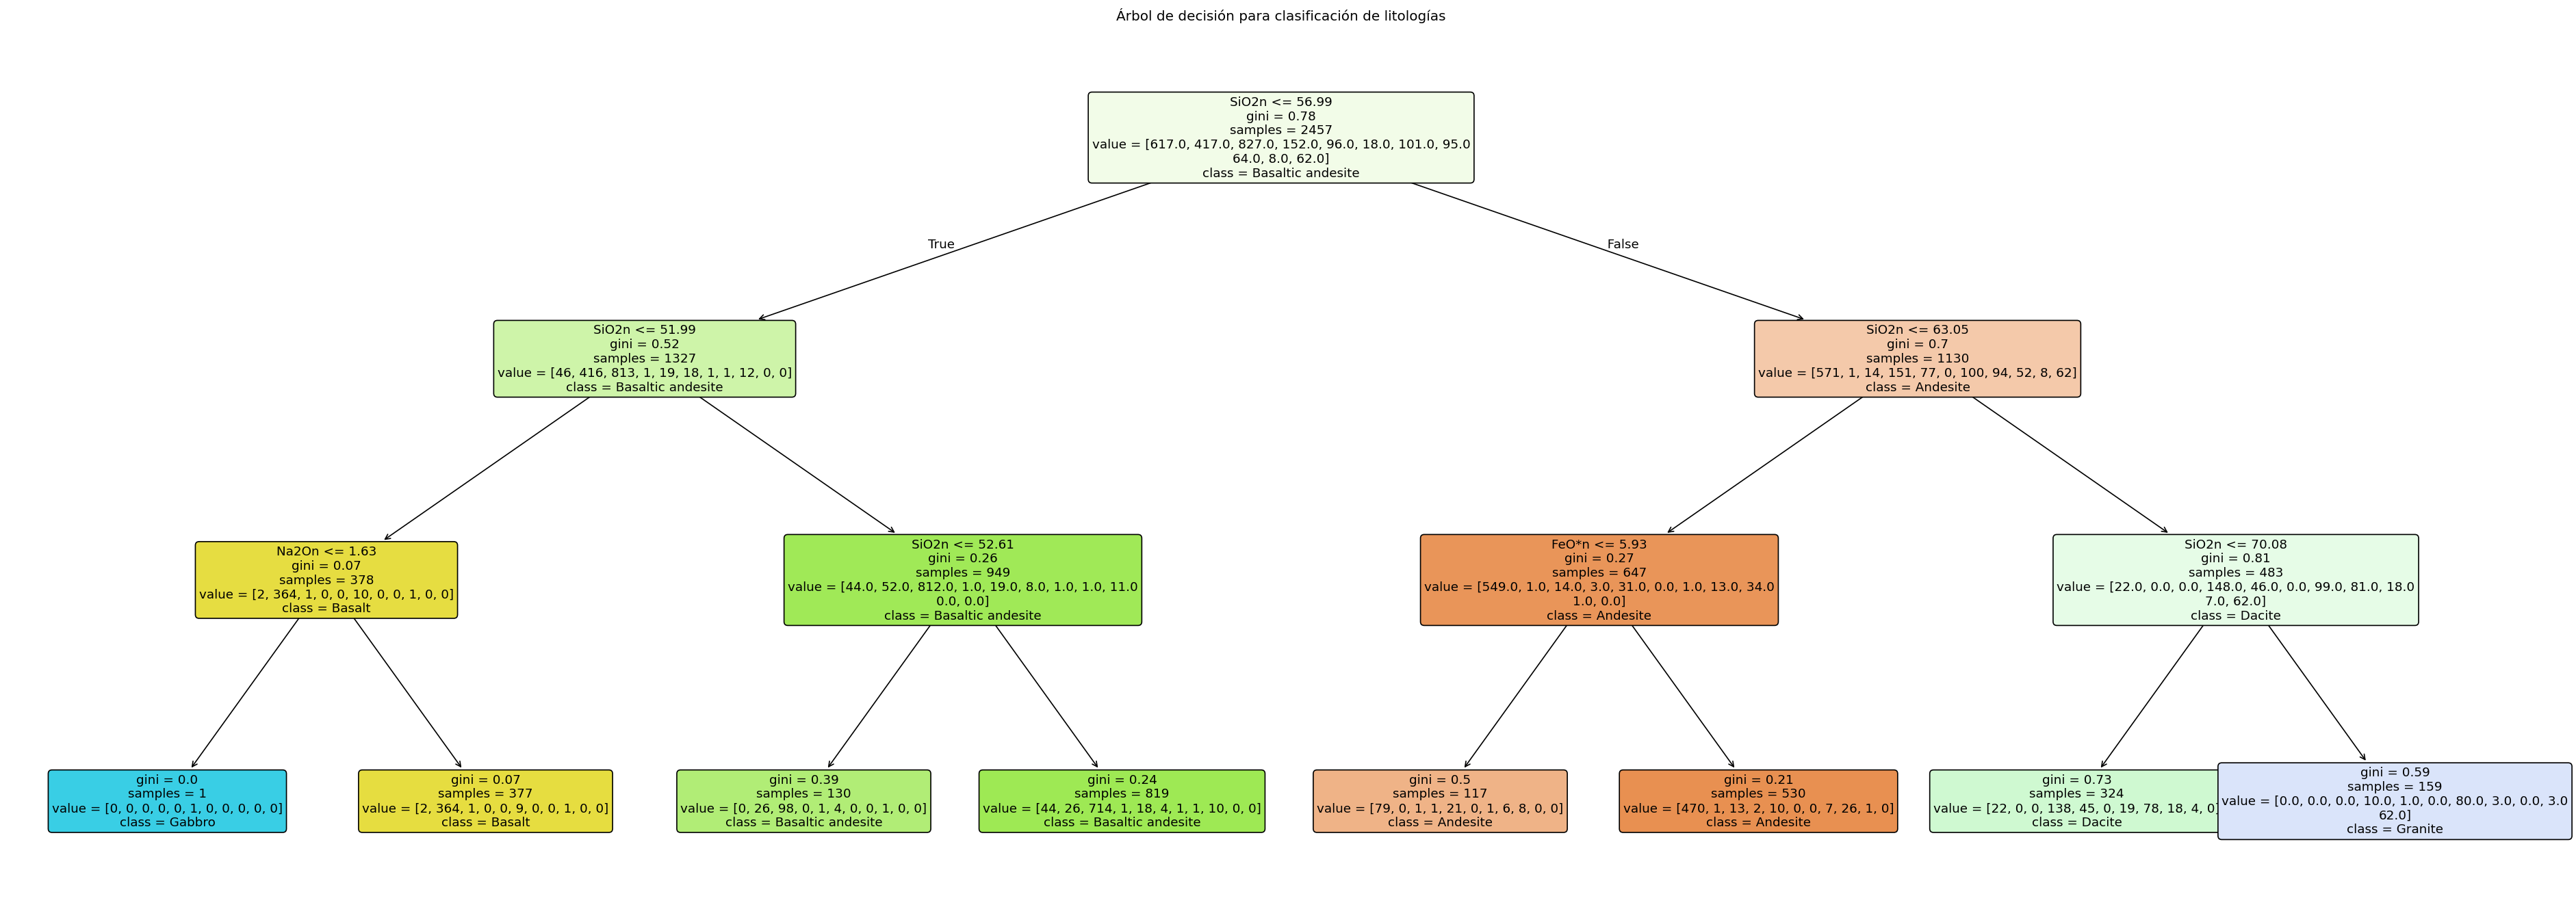

In [ ]:
from sklearn.tree import plot_tree

plt.figure(figsize=(40, 14), dpi=120)  # más grande
plot_tree(
    clf,
    feature_names=features,
    class_names=clf.classes_,
    filled=True,
    rounded=True,
    fontsize=11,
    precision=2
)
plt.title("Árbol de decisión para clasificación de litologías")
plt.show()


En **conclusion** el modelo tiene un accuracy lo suficientemente alto (0.78) para ser adecuado su aplicacion para diferenciacion de litologias. Si bien hay algunas ambiguedades se debe a que ciertas litologias tienen composicion quimica muy parecida y solo pueden diferenciarse con datos de campo que no fueron introducidos al modelo.